In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [4]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
label_map = {'Iris-setosa':0,'Iris-versicolor':1, "Iris-virginica":2}
df_train["Class"] = df_train["Species"].map(label_map)

In [6]:
x = df_train.drop(labels=["Species","Class"],axis=1).values
print(len(np.where(np.isnan(x))[0]))

0


In [7]:
from sklearn.model_selection import train_test_split
x=df_train.drop(labels=['Class','Species'],axis=1)
y=df_train['Class']
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=0.3, random_state=42)

In [8]:
print("Training data shape:",x_train.shape)
print("Testing data shape:",x_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(x_train)
print('PCA方差比',pca.explained_variance_ratio_)
print('PCA方差值',pca.explained_variance_)

PCA方差比 [0.91939858 0.05522612]
PCA方差值 [4.02578705 0.24181962]


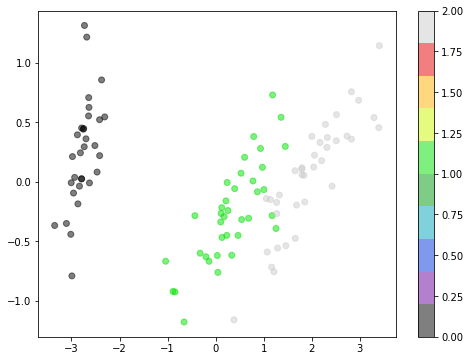

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0], train_reduced[:,1], c=y_train, alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

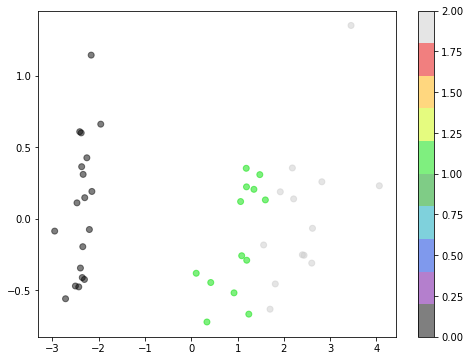

In [14]:
test_reduced = pca.fit_transform(x_test)
plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:,0], test_reduced[:,1], c=y_test, alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

In [17]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state =42,n_iter=1000)
train_reduced = tsneModel.fit_transform(x_train)

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


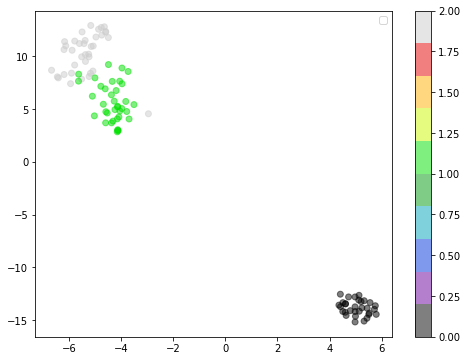

In [41]:
plt.figure(figsize=(8,6))
sns.scatter(train_reduced[:,0],train_reduced[:,1], c=y_train,alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.legend(loc = 'best')
plt.show()

In [39]:
z=df_train['Species']
m_train , m_test, n_train, n_test =train_test_split(x,z,test_size=0.3, random_state=42)

0

In [ ]:
如何刪除比較沒用的特徵
判別是哪幾個比較近有甚麼用
如何銜接線性回歸使用